In [215]:
"""Plotting referendum results in pandas.

In short, we want to make beautiful map to report results of a referendum. In
some way, we would like to depict results with something similar to the maps
that you can find here:
https://github.com/x-datascience-datacamp/datacamp-assignment-pandas/blob/main/example_map.png

To do that, you will load the data as pandas.DataFrame, merge the info and
aggregate them by regions and finally plot them on a map using `geopandas`.
"""
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [216]:
def load_data():
    """Load data from the CSV files referundum/regions/departments."""
    referendum = pd.read_csv('data/referendum.csv', sep=';')
    regions = pd.read_csv('data/regions.csv')
    departments = pd.read_csv('data/departments.csv')

    return referendum, regions, departments


In [234]:
def merge_regions_and_departments(regions, departments):
    """Merge regions and departments in one DataFrame.

    The columns in the final DataFrame should be:
    ['code_reg', 'name_reg', 'code_dep', 'name_dep']
    """
    merged_df = pd.merge(regions, departments, how='inner', left_on='code', right_on='region_code')
    result_df = merged_df[['code_x', 'name_x', 'code_y', 'name_y']]
    result_df = result_df.rename(columns={'code_x': 'code_reg', 'name_x': 'name_reg', 'code_y':'code_dep','name_y': 'name_dep'})

    return result_df


In [237]:
def merge_referendum_and_areas(referendum, regions_and_departments):
    """Merge referendum and regions_and_departments in one DataFrame.

    You can drop the lines relative to DOM-TOM-COM departments, and the
    french living abroad, which all have a code that contains `Z`.

    DOM-TOM-COM departments are departements that are remote from metropolitan
    France, like Guadaloupe, Reunion, or Tahiti.
    """

    referendum = referendum[~referendum['Department code'].str.startswith('Z')]
    merged_df = pd.merge(referendum, regions_and_departments, how='left', left_on='Department code', right_on='code_dep')
    result_df = merged_df.drop({'code_dep','name_dep'}, axis=1)
    return result_df

load_data()
referendum = pd.read_csv('data/referendum.csv', sep=';')
regions = pd.read_csv('data/regions.csv')
departments = pd.read_csv('data/departments.csv')

regions_and_departments=merge_regions_and_departments(regions, departments)
referendum_and_areas=merge_referendum_and_areas(referendum,regions_and_departments)
print(referendum_and_areas[referendum_and_areas.isna().any(axis=1)]['Department name'])


0          AIN
1          AIN
2          AIN
3          AIN
4          AIN
         ...  
3224    ARIEGE
3225    ARIEGE
3226    ARIEGE
3227    ARIEGE
3228    ARIEGE
Name: Department name, Length: 3229, dtype: object


In [233]:
load_data()
referendum = pd.read_csv('data/referendum.csv', sep=';')
regions = pd.read_csv('data/regions.csv')
departments = pd.read_csv('data/departments.csv')

regions_and_departments=merge_regions_and_departments(regions, departments)
referendum = referendum[~referendum['Department code'].str.startswith('Z')]
result_df = pd.merge(regions_and_departments, referendum, how='left', left_on='code_dep', right_on='Department code')
print(result_df.shape)
print(result_df)

(33358, 13)
      code_reg                   name_reg code_dep  \
0           01                 Guadeloupe      971   
1           02                 Martinique      972   
2           03                     Guyane      973   
3           04                 La Réunion      974   
4           06                    Mayotte      976   
...        ...                        ...      ...   
33353      COM  Collectivités d'Outre-Mer      984   
33354      COM  Collectivités d'Outre-Mer      986   
33355      COM  Collectivités d'Outre-Mer      987   
33356      COM  Collectivités d'Outre-Mer      988   
33357      COM  Collectivités d'Outre-Mer      989   

                                          name_dep Department code  \
0                                       Guadeloupe             NaN   
1                                       Martinique             NaN   
2                                           Guyane             NaN   
3                                       La Réunion         

In [213]:
load_data()
referendum = pd.read_csv('data/referendum.csv', sep=';')
regions = pd.read_csv('data/regions.csv')
departments = pd.read_csv('data/departments.csv')

regions_and_departments=merge_regions_and_departments(regions, departments)
referendum_and_areas=merge_referendum_and_areas(referendum,regions_and_departments)
print(regions_and_departments)

    code_reg                   name_reg code_dep  \
0         01                 Guadeloupe      971   
1         02                 Martinique      972   
2         03                     Guyane      973   
3         04                 La Réunion      974   
4         06                    Mayotte      976   
..       ...                        ...      ...   
104      COM  Collectivités d'Outre-Mer      984   
105      COM  Collectivités d'Outre-Mer      986   
106      COM  Collectivités d'Outre-Mer      987   
107      COM  Collectivités d'Outre-Mer      988   
108      COM  Collectivités d'Outre-Mer      989   

                                        name_dep  
0                                     Guadeloupe  
1                                     Martinique  
2                                         Guyane  
3                                     La Réunion  
4                                        Mayotte  
..                                           ...  
104  Terres austra

In [168]:
referendum_and_areas=merge_referendum_and_areas(referendum,regions_and_departments)
print(referendum_and_areas)


Empty DataFrame
Columns: [Department code, Department name, Town code, Town name, Registered, Abstentions, Null, Choice A, Choice B, code_reg, name_reg]
Index: []


In [146]:
referendum_and_areas=merge_referendum_and_areas(referendum,regions_and_departments)


def compute_referendum_result_by_regions(referendum_and_areas):
    """Return a table with the absolute count for each region.

    The return DataFrame should be indexed by `code_reg` and have columns:
    ['name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B']
    """
    
    referendum_and_areas = referendum_and_areas.groupby(['code_reg','name_reg']).sum().reset_index()
    
    result_df = referendum_and_areas.drop({'code_reg','Department code', 'Department name','Town code', 'Town name'}, axis=1)

    return result_df

referendum_result_by_regions=compute_referendum_result_by_regions(referendum_and_areas)
print(referendum_result_by_regions)

UnboundLocalError: cannot access local variable 'result_df' where it is not associated with a value

In [147]:

def plot_referendum_map(referendum_result_by_regions):
    """Plot a map with the results from the referendum.

    * Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.
    """
    geo_data = gpd.read_file('data/regions.geojson')
    referendum_result_by_regions = referendum_result_by_regions.set_index('name_reg')
    merged_data = geo_data.merge(referendum_result_by_regions, left_on='nom', right_index=True)
    merged_data['ratio'] = merged_data['Choice A'] / (merged_data['Choice A'] + merged_data['Choice B'])

    merged_data.plot(column='ratio', cmap='viridis', legend=True, figsize=(12, 8))
    plt.title('Referendum Results: Ratio of "Choice A" over all expressed ballots')
    plt.show()

    return merged_data


                      name_reg  Registered  Abstentions   Null  Choice A  \
0         Auvergne-Rhône-Alpes     4334439       759462  66232   1489049   
1      Bourgogne-Franche-Comté     1997925       358321  33671    668246   
2                     Bretagne     2380594       364724  36077    944052   
3          Centre-Val de Loire     1801366       326560  28827    590890   
4                        Corse      220349        56696   2921     60917   
5                    Grand Est     3660510       742840  54471   1024949   
6              Hauts-de-France     3834376       793627  55405   1290341   
7                    Normandie     2372779       426075  35513    816972   
8           Nouvelle-Aquitaine     4201774       711017  71629   1641249   
9                    Occitanie     3892146       642412  60912   1475114   
10            Pays de la Loire     2605438       412509  47677    922468   
11  Provence-Alpes-Côte d'Azur     2459998       474066  31690    735932   
12          

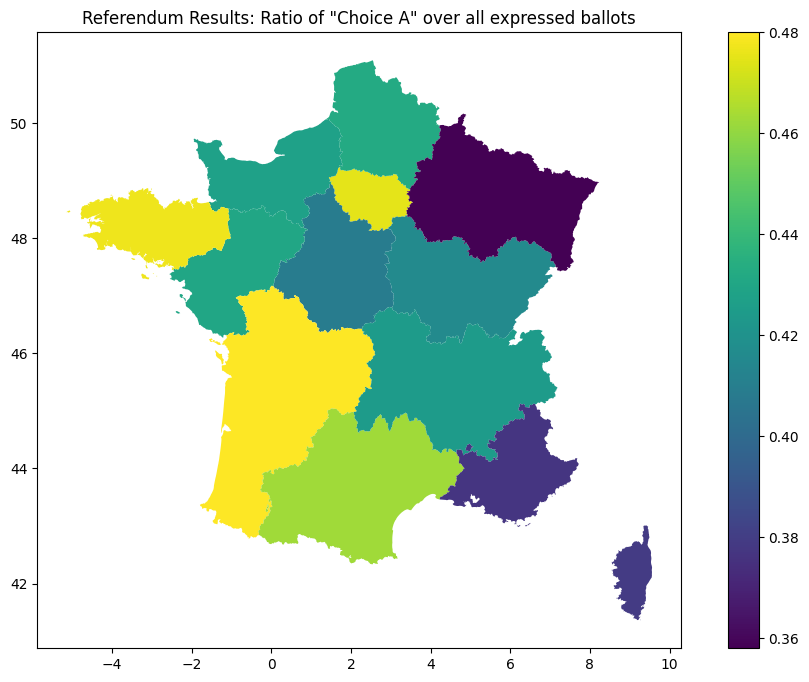

In [125]:
if __name__ == "__main__":

    referendum, df_reg, df_dep = load_data()
    regions_and_departments = merge_regions_and_departments(
        df_reg, df_dep
    )
    referendum_and_areas = merge_referendum_and_areas(
        referendum, regions_and_departments
    )
    referendum_results = compute_referendum_result_by_regions(
        referendum_and_areas
    )
    print(referendum_results)

    plot_referendum_map(referendum_results)
    plt.show()
    

0


In [100]:
referendum['Department code'].size

36791

In [111]:
referendum = pd.read_csv('data/referendum.csv', sep=';')
#print(referendum['Department code'].str.startswith('Z').sum())
referendum = referendum[~referendum['Department code'].str.startswith('Z')]

print(referendum.shape)


(36565, 9)


In [109]:
referendum['Department code'].str.startswith('Z')

0        False
1        False
2        False
3        False
4        False
         ...  
36560    False
36561    False
36562    False
36563    False
36564    False
Name: Department code, Length: 36565, dtype: bool

In [121]:
print(geo_data)

    code                         nom  \
0     11               Île-de-France   
1     24         Centre-Val de Loire   
2     27     Bourgogne-Franche-Comté   
3     28                   Normandie   
4     32             Hauts-de-France   
5     44                   Grand Est   
6     52            Pays de la Loire   
7     53                    Bretagne   
8     75          Nouvelle-Aquitaine   
9      1                  Guadeloupe   
10     2                  Martinique   
11     3                      Guyane   
12     4                  La Réunion   
13     6                     Mayotte   
14    76                   Occitanie   
15    84        Auvergne-Rhône-Alpes   
16    93  Provence-Alpes-Côte d'Azur   
17    94                       Corse   

                                             geometry  
0   POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...  
1   POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...  
2   POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...  
3   POLYGON ((-

                      name_reg  \
0         Auvergne-Rhône-Alpes   
1      Bourgogne-Franche-Comté   
2                     Bretagne   
3          Centre-Val de Loire   
4                        Corse   
5                    Grand Est   
6              Hauts-de-France   
7                    Normandie   
8           Nouvelle-Aquitaine   
9                    Occitanie   
10            Pays de la Loire   
11  Provence-Alpes-Côte d'Azur   
12               Île-de-France   

                                             code_dep  \
0   1515151515151515151515151515151515151515151515...   
1   2121212121212121212121212121212121212121212121...   
2   2222222222222222222222222222222222222222222222...   
3   1818181818181818181818181818181818181818181818...   
4   2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A2A...   
5   1010101010101010101010101010101010101010101010...   
6   5959595959595959595959595959595959595959595959...   
7   1414141414141414141414141414141414141414141414...   
8   161616

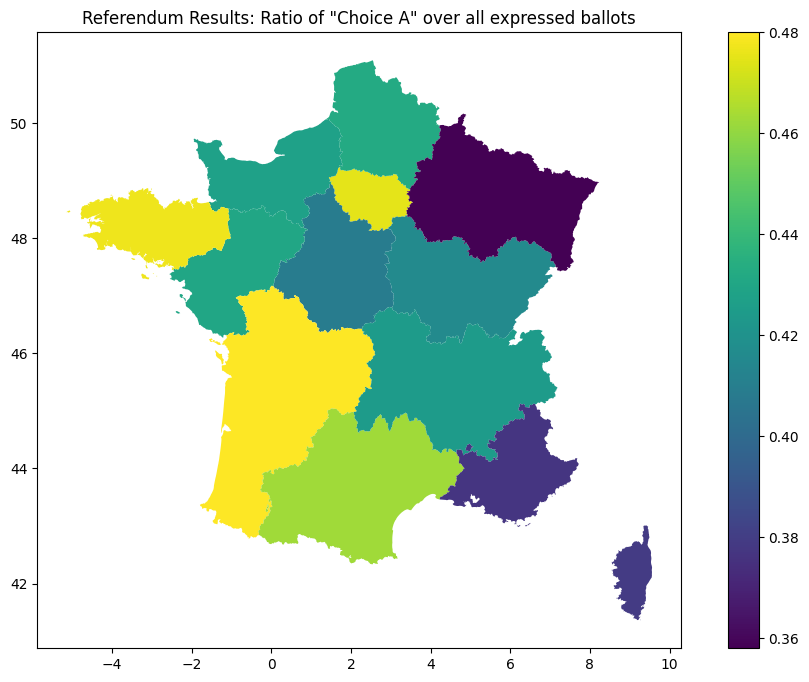

In [126]:
"""Plotting referendum results in pandas.

In short, we want to make beautiful map to report results of a referendum. In
some way, we would like to depict results with something similar to the maps
that you can find here:
https://github.com/x-datascience-datacamp/datacamp-assignment-pandas/blob/main/example_map.png

To do that, you will load the data as pandas.DataFrame, merge the info and
aggregate them by regions and finally plot them on a map using `geopandas`.
"""
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


def load_data():
    """Load data from the CSV files referundum/regions/departments."""
    referendum = pd.read_csv('data/referendum.csv', sep=';')
    regions = pd.read_csv('data/regions.csv')
    departments = pd.read_csv('data/departments.csv')

    return referendum, regions, departments


def merge_regions_and_departments(regions, departments):
    """Merge regions and departments in one DataFrame.

    The columns in the final DataFrame should be:
    ['code_reg', 'name_reg', 'code_dep', 'name_dep']
    """
    
    merged_df = pd.merge(regions, departments, how='inner', left_on='code', right_on='region_code')
    result_df = merged_df[['code_x', 'name_x', 'code_y', 'name_y']]
    result_df = result_df.rename(columns={'code_x': 'code_reg', 'name_x': 'name_reg', 'code_y':'code_dep','name_y': 'name_dep'})
    return result_df



def merge_referendum_and_areas(referendum, regions_and_departments):
    """Merge referendum and regions_and_departments in one DataFrame.

    You can drop the lines relative to DOM-TOM-COM departments, and the
    french living abroad, which all have a code that contains `Z`.

    DOM-TOM-COM departments are departements that are remote from metropolitan
    France, like Guadaloupe, Reunion, or Tahiti.
    """

    referendum = referendum[~referendum['Department code'].str.startswith('Z')]
    result_df = pd.merge(regions_and_departments, referendum, how='inner', left_on='code_dep', right_on='Department code')
    return result_df 


def compute_referendum_result_by_regions(referendum_and_areas):
    """Return a table with the absolute count for each region.

    The return DataFrame should be indexed by `code_reg` and have columns:
    ['name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B']
    """
    referendum_and_areas = referendum_and_areas.drop({'code_reg','Department code', 'Department name','Town code', 'Town name'}, axis=1)
    result_df = referendum_and_areas.groupby(['name_reg']).sum().reset_index()
    return result_df



def plot_referendum_map(referendum_result_by_regions):
    """Plot a map with the results from the referendum.

    * Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.
    """
    geo_data = gpd.read_file('data/regions.geojson')
    referendum_result_by_regions = referendum_result_by_regions.set_index('name_reg')
    merged_data = geo_data.merge(referendum_result_by_regions, left_on='nom', right_index=True)
    merged_data['ratio'] = merged_data['Choice A'] / (merged_data['Choice A'] + merged_data['Choice B'])

    merged_data.plot(column='ratio', cmap='viridis', legend=True, figsize=(12, 8))
    plt.title('Referendum Results: Ratio of "Choice A" over all expressed ballots')
    plt.show()

    return merged_data


if __name__ == "__main__":

    referendum, df_reg, df_dep = load_data()
    regions_and_departments = merge_regions_and_departments(
        df_reg, df_dep
    )
    referendum_and_areas = merge_referendum_and_areas(
        referendum, regions_and_departments
    )
    referendum_results = compute_referendum_result_by_regions(
        referendum_and_areas
    )
    print(referendum_results)

    plot_referendum_map(referendum_results)
    plt.show()
